# Scientific Python: part 2
## Plotting with matplotlib

__Software Carpentry Bootcamp  
eResearch NZ 2013__  

Prepared by: Ariel Rokem
       
Thanks to:Justin Kitzes, Paul Ivanov

## 1. Getting Started

### 1.1 What is matplotlib?

Matplotlib is the most popular and mature library for plotting data using
Python. It has all of the functionality you would expect, including the ability to control
the formatting of plots and figures at a very fine level.

The official matplotlib documentation is at http://matplotlib.org/  
The matplotlib gallery is at http://matplotlib.org/gallery.html

### 1.2 Importing matplotlib

Matplotlib is often used through 'pyplot', which provides a high-level interface for
plotting.

In [8]:
# In IPython or the IPython notebook, it's easiest to use the pylab magic, which
# imports matplotlib, numpy, and scipy.

# The inline flag means that images will be shown here in the notebooks, rather
# than in pop-up windows.

%pylab inline

# If you are using 'regular' Python, however, you'll want the following. You'll
# need to also separately import numpy and any other packages that you might need.

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 2. Creating Figures

There are two major challenges with creating figures. First is understanding the
syntax to actually make the basic plot appear. Second is formatting the basic plot to look
exactly how you would like it to look. In general, the formatting will probably take you
longer...

Within pyplot (currently imported as 'plt'), there are two basic ways to go about making
plots - using the Matlab-like clone, and using the object-oriented approach. The latter
provides better control over plot features, while only requiring slightly more typing. It's
easy to quickly outgrow the Matlab clone, so we'll go right to the object-oriented syntax.

### 2.1 A first plot

In simple matplotlib plotting, there are two concepts to distinguish:

- __Figure__ - the entire figure, like what you might see in a journal, including all
subplots, axes, lines, labels, etc. The whole encilada.  
  
- __Subplot/Axes__ - one of the sub-sections of the figure, labeled (a), (b), etc. in
articles. Each subplot will contain one Axes object, which is the container where all of the
useful stuff, such as actual lines, legends, labels, etc., are actually housed.

For example, here's how to make one figure with two subplots, the second of which contains
two lines.

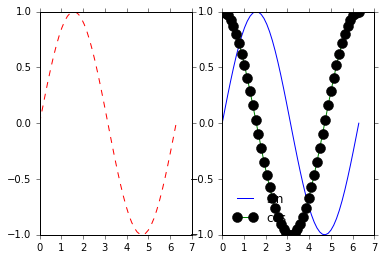

In [49]:
# Make some data to plot
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.cos(x)

# First, create an empty figure with 2 subplots
# - The arguments (1, 2) indicate 1 row and 2 cols
# - The function plt.subplots returns an object for the figure and for each axes
# - There are multiple ways to accomplish this same goal, but this is probably the
#   simplest - notice that each subplot is associated with one of the axes objects.
fig, (ax1, ax2) = plt.subplots(1, 2)

# Next, put one line on the first axis and both lines on the second axis
# - On the second axes, add a legend to distinguish the two lines
ax1.plot(x, y1, 'r--')
s = ax2.plot(x, y1)
c = ax2.plot(x, y2, 'g-', marker='o', markerfacecolor='k', markersize=10)
ax2.legend(['sin', 'cos'], loc=0, frameon=False)
# Finally, save the figure as a png file
fig.savefig('example.png', format='png')

### Exercise 1 - Simple formatting

There are lots of formatting options to play with. Modify the code above to make some changes to the
formatting of these plots.

First, make some changes to the axes. HINT: These adjustments are methods to the ax1 and ax2 objects,
and (conveniently) they all start with the text 'set_'. Try typing 'ax1.set_' and hitting tab to
see some options.

* Change the x axis on ax1 to run from 0 to 4. (HINT: set_xlim)
* Add labels to the x axis on both subplots (HINT: set_xlabel, set_ylabel)

Second, make some changes to the lines that you plotted using ax1.plot(...). These changes can be made
by looking at the various arguments that you can give to the plot method. You can do this easily by
typing ax1.plot? in the cell below and running it - this will give you pop-up help for the plot method.

* Make the sine line on ax1 red and dashed.
* Put a circular black marker on top of the cos line on ax2. Make it really big.

_Bonus_: Eliminate the box around the legend on the second subplot. Check axis.legend?

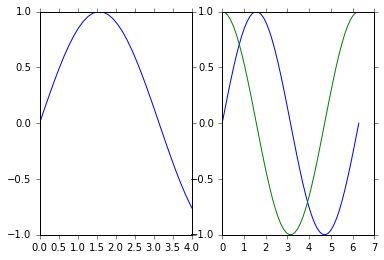

In [36]:
#ax1.plot?

In [37]:
ax1.plot?

### 2.2 Other types of plots

In the example above, we used the plot method to make line plots. There are also methods to
make scatter plots, barplots, histograms, loglog plots, semilog plots, etc.

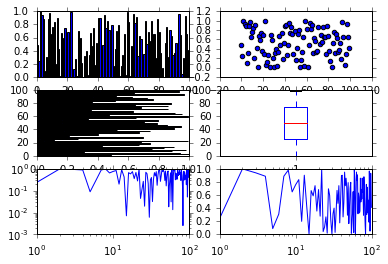

In [60]:
# Make some data to plot
x = np.arange(0, 100)
y = np.random.rand(100)  # 100 random numbers

# Make a figure with 6 subplots and axes
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

# Add data to each axis. Optional arguments to each method will customize each plot.
ax1.bar(x,y)
ax2.scatter(x,y)
ax3.barh(x,y)
ax4.boxplot(x)
ax5.loglog(x,y)
ax6.semilogx(x,y)

### 2.3 Plotting images

Matplotlib also makes it easy to plot images. For this, you can use the plot method imshow
(syntax borrowed from Matlab).

AttributeError: 'AxesSubplot' object has no attribute 'cmap'

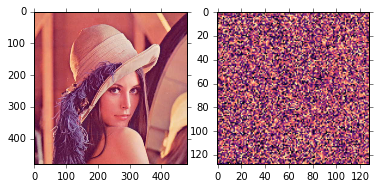

In [7]:
# Read an image file for first subplot, generate random array for second
img1 = plt.imread('lena.png')
img2 = np.random.rand(128, 128)

# Make figure
fig, ((ax1, ax2)) = plt.subplots(1, 2)
ax1.imshow(img1)
ax2.imshow(img2, cmap='magma')
print ax2.cmap

## 3. The matplotlib gallery

It can be very intimidating to try to craft exactly the figure that you want, especially if
you are used to being able to adjust things visually using a program like Excel.

If you get stuck and don't know where to start, or just want to learn more about what
matplotlib can do, a great option is to have a look at the matplotlib gallery, which can be
found at http://matplotlib.org/gallery.html. A good way to get started is to find a figure
here that sort of looks like what you want, copy the code, and modify it for your own needs.

### Exercise 2 - Exploring the matplotlib gallery

Have a look at the matplotlib gallery, find a cool looking figure, copy the code
into the box below, and modify it. Note that some of the examples might require packages that
are not installed on your machine (in particular those that make maps) -
if this is the case, pick another example for the purposes of this exercise.

In IPython, you can use the "load magic". Type %loadpy and then the URL of the py file containing the
code, and it will automatically copy it into a cell below. Run the cell with the code to see the
figure.

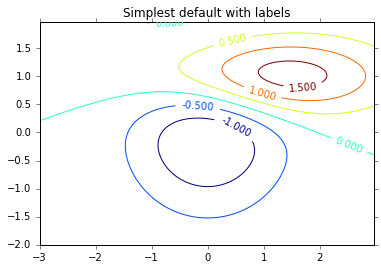

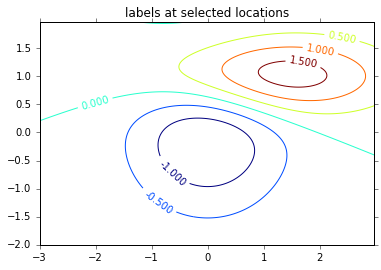

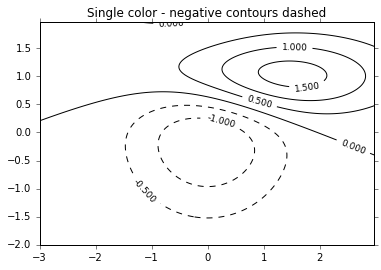

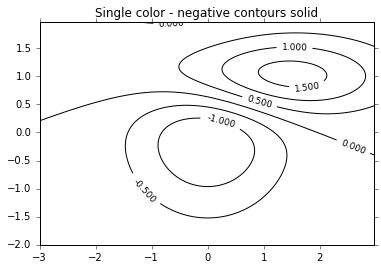

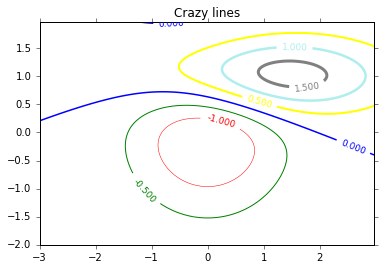

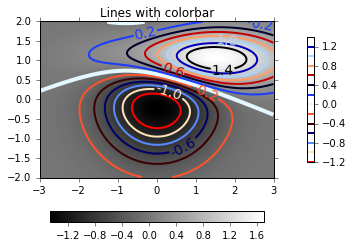

In [4]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/contour_demo.py
#!/usr/bin/env python
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()


## 4. Formatting figures

The formatting of figures often takes longer than actually setting them up and adding data.
There are many different approaches to formatting figures in matplotlib (many goals can be
accomplished in different ways, using different commands), and you will come across many
of these as you learn more. The tips below give a few simple ways to get started.

### 4.1 Common formatting tricks

There are hundreds of formatting options available in matplotlib, many of which you will end
up using occasionally. There are a few options, however, that you will use very frequently.
A short list of these might include:

- Changing axis limits
- Changing line colors
- Changing lines to dashed (for black and white figures)
- Adding markers to lines
- Make tick labels point outward instead of inward
- Get rid of the box surrounding the plot
- Adding subplot letters, like (a) and (b)

Here's how to accomplish all of these things.

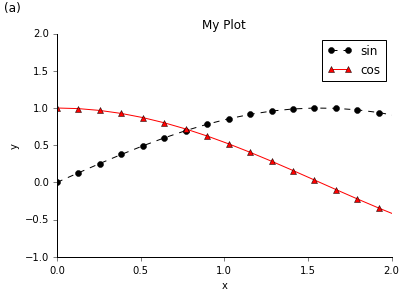

In [50]:
# Make some data to plot
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.cos(x)

# First, create an empty figure with 1 subplot
fig, ax1 = plt.subplots(1, 1)

# Add title and labels
ax1.set_title('My Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Change axis limits
ax1.set_xlim([0,2])
ax1.set_ylim([-1, 2])

# Add the lines, changing their color, style, and marker
ax1.plot(x, y1, 'k--o', label='sin') # Black line, dashed, with 'o' markers
ax1.plot(x, y2, 'r-^', label='cos') # Red line, solid, with triangle-up markers

# Adjust tick marks and get rid of 'box'
ax1.tick_params(direction='out', top=False, right=False) # Turn ticks out
ax1.spines['top'].set_visible(False) # Get rid of top axis line
ax1.spines['right'].set_visible(False) #  Get rid of bottom axis line

# Add subplot letter
ax1.annotate('(a)', (0.01, 0.96), size=12, xycoords='figure fraction')

# Add legend
ax1.legend()

# Finally, save the figure as a png file
fig.savefig('myfig-formatted.png')

### 4.2 Advanced formatting with rcParams

A fast way to control many aspects of figure formatting is to temporarily modify a dictionary
called rcParams. This dictionary allows you to set, in one place, many of the options that
you will need to change before submitting your figures for publication, including figure
fonts, font sizes, figure size, figure dpi, etc., as well as many options regarding how
elements are spaced in your figures (ie, the distance between different elements of subfigures).

WARNING: The rcParams dictionary is GLOBAL to matplotlib's plot library - therefore, if you
make a change to it, all future plots that you make will also have those changes (until you
close your Python session). If you do modify rcParams, it's good hygiene to set it back to the
defaults after you've made your plot, as described below.

A description of the rcParams options can be found at
http://matplotlib.org/users/customizing.html

Run the code below to see all of the different options you can set here. Once you've looked
this over, hit the Toggle button on the left to hide the output again.

In [51]:
# View rcParams
matplotlib.rcParams

RcParams({u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.html': u'none',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.axisbelow': False,
          u'axes.edgecolor': u'k',
          u'axes.facecolor': u'w',
          u'axes.formatter.limits': [-7, 7],
          u'axes.formatter.use_locale': False,
          u'axes.formatter.use_mathtext': False,
          u'axes.formatter.useoffset': True,
          u'axes.grid': False,
          u'axes.grid.axis': u'both',
          u'axes.grid.which': u'major',
     

Now, save the default rcParams dictionary so we can 'reset' everything after we change it.
In a 'regular' Python interpreter, or inside a Python module, you can just use
plt.rcdefaults() to reset the defaults, instead of saving them here then resetting them
manually later. However, this work in the notebook.

In [52]:
# Save default rcParams so we can reset them later
# WARNING: Do not run this cell after changing rcParams, as it will overwrite the
# defaults that we are trying to preserve.
rcdef = plt.rcParams.copy()

Now let's make a simple plot, using mostly default formatting.

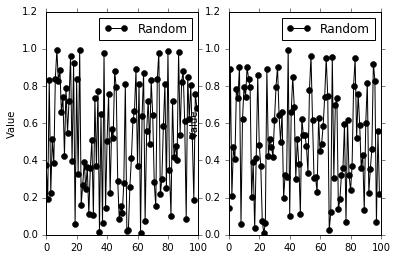

In [53]:
# Make sure rcParams is at default settings, since we're messing with it
plt.rcParams.update(rcdef)

# Make a simple figure with default formatting
fig, axall = plt.subplots(1, 2)  # axall is the tuple containing both axis objects

for ax in axall:
    ax.plot(np.random.rand(100), 'k-o', label='Random')
    ax.set_ylim([0, 1.2])
    ax.set_ylabel('Value')
    ax.legend()

There are many obvious formatting problems here. The legend is too big, the axis labels are
too small, the legend shouldn't have a box (arguably), and the y-axis label on the second
subplot is hidden behind the first subplot. Also, although you can't see it here, the figure
resolution is too low to print without appearing fuzzy.

The code below changes a whole bunch of values in rcParams to get a figure to look juuuuust
right. Then it makes the figures, saves it, and puts rcParams back to its default.

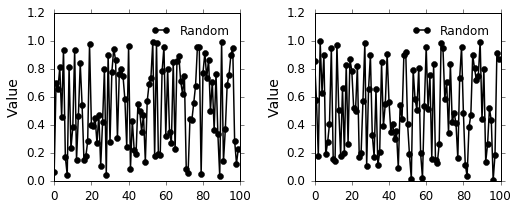

In [54]:
# Choose a bunch of new parameter values
# In practice, you'll try modifying these, running the code and saving the figure,
# looking at the figure, then making more modifications until you're happy.
newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (8, 3),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}

# Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
plt.rcParams.update(rcdef)
plt.rcParams.update(newparams)

# Make the new figure with new formatting
fig, axall = plt.subplots(1, 2)

for ax in axall:
    ax.plot(np.random.rand(100), 'k-o', label='Random')
    ax.set_ylim([0, 1.2])
    ax.set_ylabel('Value')
    ax.legend()
    
fig.savefig('myfig-advanced.png')

# Put rcParams back to default
plt.rcParams.update(rcdef)

You'll want to check that your formatting looks good by looking at the file that's being saved
to your hard disk, since that's exactly how it will look to the publisher or when inserted
into your manuscript.